###Import Data From Phase 1

In [ ]:
import pandas as pd
!wget https://raw.githubusercontent.com/msrinag/pygroupprojectub/main/car_resale_prices_cleaned.csv
data = pd.read_csv("/content/car_resale_prices_cleaned.csv")
rowsload=data.shape[0]
print("Number of Rows:",rowsload) #>2000 so meets requirement for project
data.head()

--2024-03-29 01:23:11--  https://raw.githubusercontent.com/msrinag/pygroupprojectub/main/car_resale_prices_cleaned.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2113976 (2.0M) [text/plain]
Saving to: ‘car_resale_prices_cleaned.csv’

car_resale_prices_c 100%[===================>]   2.02M  --.-KB/s    in 0.06s   

2024-03-29 01:23:11 (31.4 MB/s) - ‘car_resale_prices_cleaned.csv’ saved [2113976/2113976]

Number of Rows: 16598


,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,insurance_value,transmission_type_value,fuel_type_value,body_type_value,owner_type_Value
0,i Baleno 1.2 Alpha,545000.0,2017,1197,Third Party,Manual,40000,First Owner,Petrol,83.10,5.0,21.40,Hatchback,Agra,2,1,1,1,1
1,Hexa XTA,1000000.0,2018,2179,Third Party,Automatic,70000,First Owner,Diesel,153.86,7.0,17.60,MUV,Agra,2,2,2,4,1
2,i Swift Dzire VXI,450000.0,2015,1197,Third Party,Manual,70000,Second Owner,Petrol,83.14,5.0,20.85,Sedan,Agra,2,1,1,2,2
3,ai i10 Magna 1.1,160000.0,2009,1086,Third Party,Manual,80000,First Owner,Petrol,68.05,5.0,19.81,Hatchback,Agra,2,1,1,1,1
4,ai i20 Active 1.2,470000.0,2015,1197,Third Party,Manual,70000,First Owner,Petrol,81.86,5.0,17.19,Hatchback,Agra,2,1,1,1,1


###ML Models

## 1. Linear Regression

Linear Regression Mean Absolute Error: 295585.5955164998
Linear Regression Mean Squared Error: 305626150983.82806
Linear Regression Root Mean Squared Error: 552834.6506721771
Linear Regression R^2 Score: 0.6224796564599483
F-Statistic: 945.6741575857254



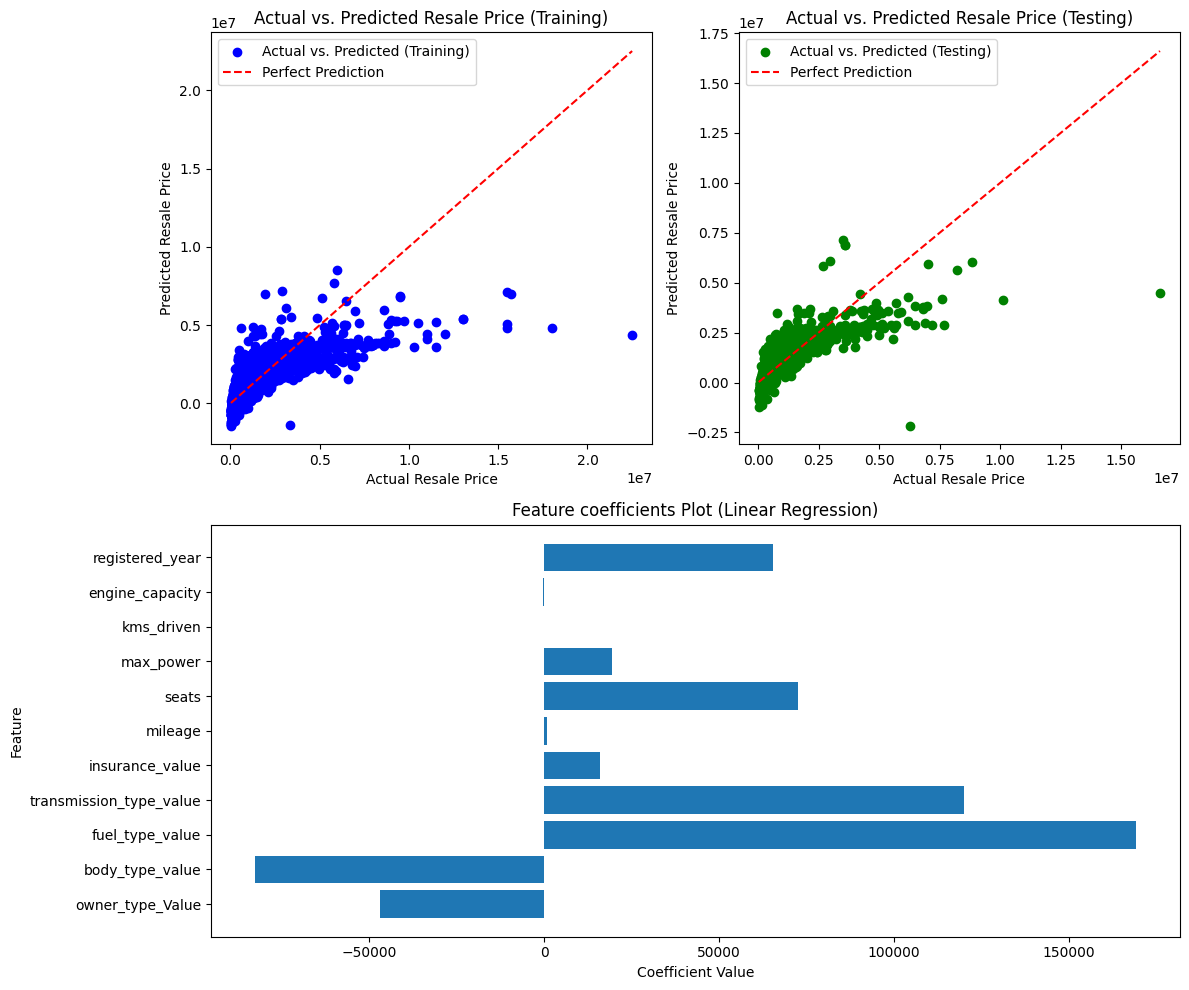

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

X = data.drop(['resale_price', 'full_name','insurance','transmission_type','owner_type','fuel_type','body_type','city'], axis=1)  # exclude features not required for model training
y = data['resale_price']  # Target variable


# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# Creating and training the Linear Regression model
lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)

# Making predictions
y_pred_lr = lr_regressor.predict(X_test)

# Calculate metrics
lr_mae = mean_absolute_error(y_test, y_pred_lr)
print(f'Linear Regression Mean Absolute Error: {lr_mae}')

lr_mse = mean_squared_error(y_test, y_pred_lr)
print(f'Linear Regression Mean Squared Error: {lr_mse}')
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f'Linear Regression Root Mean Squared Error: {lr_rmse}')

lr_r2 = r2_score(y_test, y_pred_lr)
print(f'Linear Regression R^2 Score: {lr_r2}')

# Calculate F-statistics
n = len(y_test)  # Number of samples
k = X_test.shape[1]  # Number of features
lr_F_statistic = (lr_mae**2) / (lr_mse / (n - k - 1))
print(f'F-Statistic: {lr_F_statistic}')
print()  # creating space b/w graph and text

# Plotting actual vs. predicted values for training data
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
y_pred_train = lr_regressor.predict(X_train)
plt.scatter(y_train, y_pred_train, color='blue', label='Actual vs. Predicted (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs. Predicted Resale Price (Training)')
plt.legend()

# Plotting actual vs. predicted values for testing data
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_lr, color='green', label='Actual vs. Predicted (Testing)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs. Predicted Resale Price (Testing)')
plt.legend()

# Get feature importances from the trained model
coefficients = lr_regressor.coef_

# Create a bar plot
plt.subplot(2, 1, 2)
bar=plt.barh(X.columns, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature coefficients Plot (Linear Regression)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Linear Regression:

* Despite being a basic model, linear regression shows moderate performance with relatively high error metrics compared to ensemble methods.
* Its simplicity might result in underfitting, as it struggles to capture complex relationships in the data effectively.
* From the actual vs. predicted comparison, we can observe that the model doesn't capture the trend very well.

Outputs:

Coefficients of the independent variables (age, mileage, engine capacity, etc.), intercept, R-squared value, p-values.

Insights:

The coefficients indicate the impact of each independent variable on the resale price. For example, a positive coefficient for engine capacity suggests that higher engine capacity leads to a higher resale price, holding other factors constant.

The R-squared value (0.622) suggests that the linear regression model explains approximately 62.2% of the variance in the resale prices, indicating moderate predictive power.


## 2. Ridge Regression

Ridge Regression Mean Absolute Error: 295582.7778775572
Ridge Regression Mean Squared Error: 305624688148.59656
Ridge Regression Root Mean Squared Error: 552833.3276391688
Ridge Regression R-squared: 0.6224814634063022
F-Statistic: 3308.0


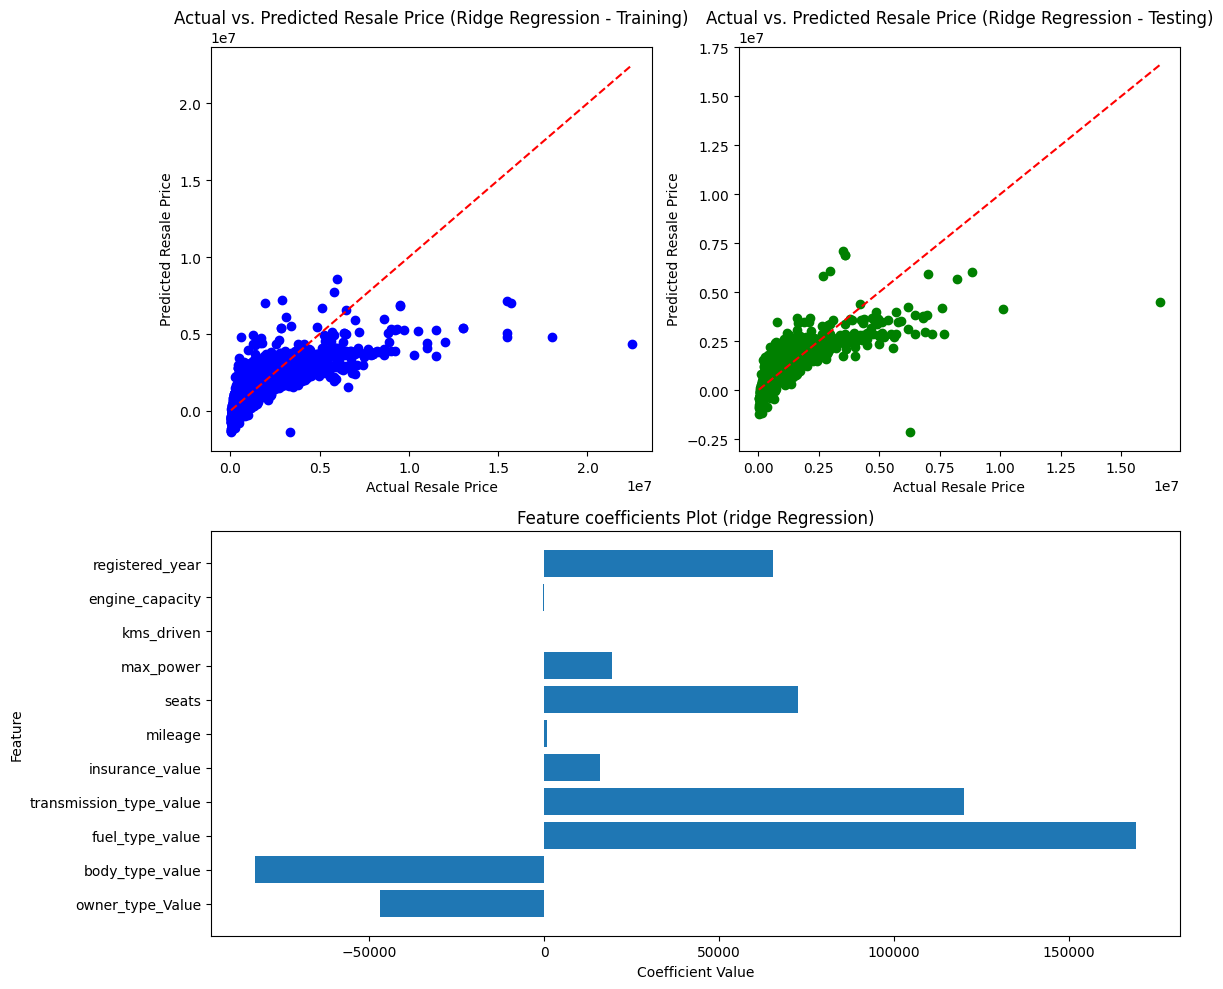

In [ ]:
from sklearn.linear_model import Ridge

# Initialize and fit Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Making predictions
predictions_train_ridge = ridge_model.predict(X_train)
predictions_test_ridge = ridge_model.predict(X_test)

# Calculate and print evaluation metrics
mae_test_ridge = mean_absolute_error(y_test, predictions_test_ridge)
print(f'Ridge Regression Mean Absolute Error: {mae_test_ridge}')

mse_test_ridge = mean_squared_error(y_test, predictions_test_ridge)
print(f'Ridge Regression Mean Squared Error: {mse_test_ridge}')

rmse_test_ridge = np.sqrt(mse_test_ridge)
print(f'Ridge Regression Root Mean Squared Error: {rmse_test_ridge}')

r2_test_ridge = r2_score(y_test, predictions_test_ridge)
print(f'Ridge Regression R-squared: {r2_test_ridge}')

# Calculate F-statistics for Ridge Regression
n = len(y_test)  # Number of samples
k = X_test.shape[1]  # Number of features
F_statistic_ridge = (rmse_test_ridge**2) / (mse_test_ridge / (n - k - 1))
print(f'F-Statistic: {F_statistic_ridge}')

# Plotting actual vs. predicted values for training data
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.scatter(y_train, predictions_train_ridge, color='blue')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs. Predicted Resale Price (Ridge Regression - Training)')

# Plotting actual vs. predicted values for testing data
plt.subplot(2, 2, 2)
plt.scatter(y_test, predictions_test_ridge, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs. Predicted Resale Price (Ridge Regression - Testing)')

# Feature importance analysis is not applicable for Ridge Regression as it is a linear model
# Get feature importances from the trained model
coefficients = ridge_model.coef_

# Create a bar plot
plt.subplot(2, 1, 2)
bar=plt.barh(X.columns, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature coefficients Plot (ridge Regression)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Why Ridge and Not Lasso?

Rule of thumb: Many correlated features, so Ridge. (helps reduce many correlated features)

Ridge Regression:

* Ridge regression, with its regularization term, slightly improves performance over plain linear regression.

* However, the impact of regularization on performance appears negligible, as indicated by similar error metrics between linear and ridge regression.

* This suggests that the added complexity of ridge regression may not be fully utilized for this particular dataset.

* Still not much improvement from the linear model, although a higher F-statistic indicates a better model.


Outputs:

Coefficients of the independent variables, intercept, R-squared value.

Insights:

Ridge regression can help in handling multicollinearity, which is common in datasets with multiple correlated features.

The regularization parameter (alpha) in ridge regression helps in controlling overfitting, which can be beneficial in complex datasets like car resale values.


## 3. Decision Tree Regression

Decision Tree Regression Mean Absolute Error: 147290.5371485944
Decision Tree Regression Mean Squared Error: 119824256887.96854
Decision Tree Regression Root Mean Squared Error: 346156.4052389736
Decision Tree Regression R-squared: 0.8519887958567691
F-Statistic: 3307.9999999999995



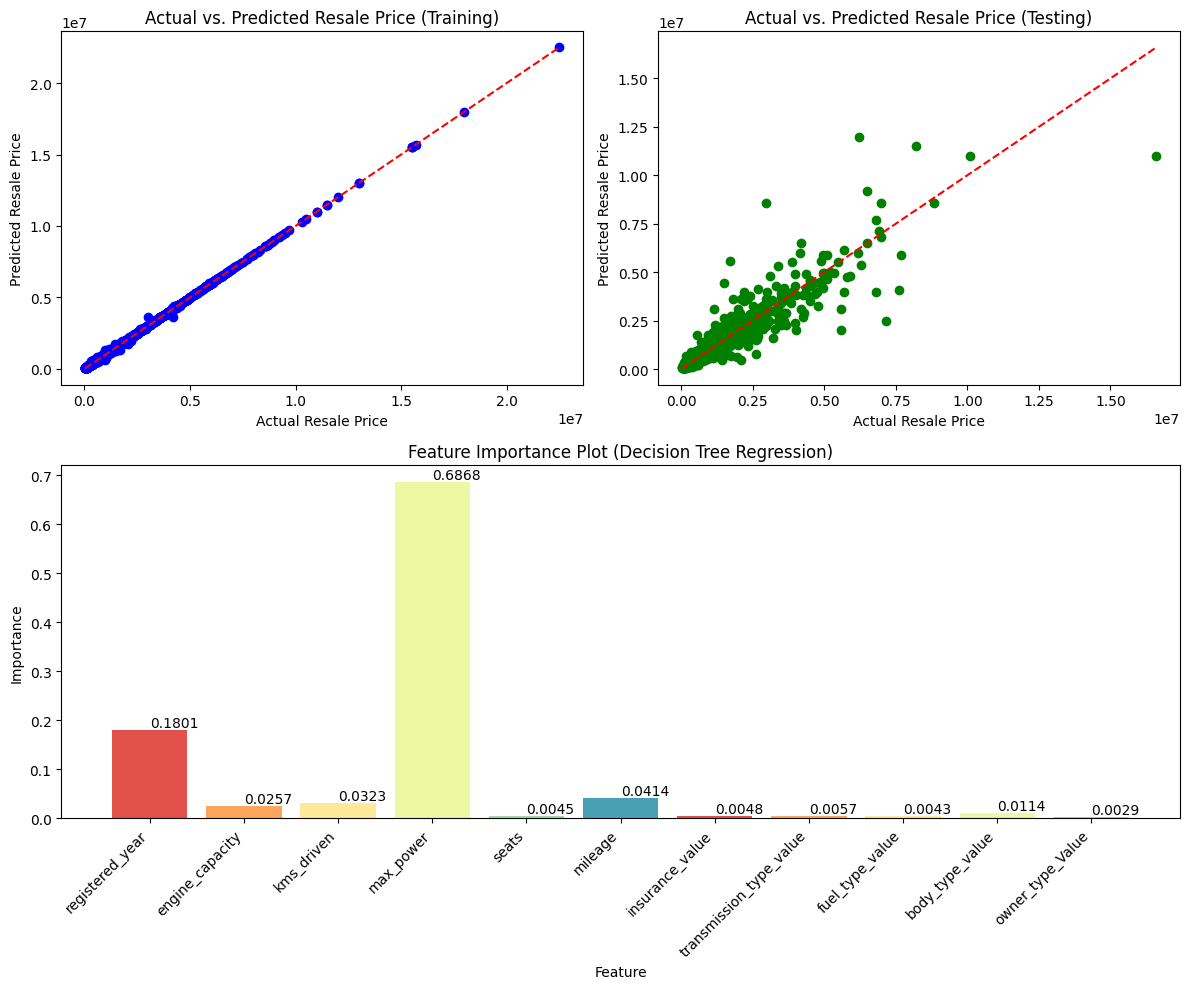

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and fit Decision Tree Regressor
model_dt = DecisionTreeRegressor(random_state=1000)
model_dt.fit(X_train, y_train)

# Making predictions
predictions_train = model_dt.predict(X_train)
predictions_test = model_dt.predict(X_test)

# Calculate and print evaluation metrics
mae_test = mean_absolute_error(y_test, predictions_test)
print(f'Decision Tree Regression Mean Absolute Error: {mae_test}')

mse_test = mean_squared_error(y_test, predictions_test)
print(f'Decision Tree Regression Mean Squared Error: {mse_test}')

rmse_test = np.sqrt(mse_test)
print(f'Decision Tree Regression Root Mean Squared Error: {rmse_test}')

r2_test = r2_score(y_test, predictions_test)
print(f'Decision Tree Regression R-squared: {r2_test}')


# Calculate F-statistics
n = len(y_test)  # Number of samples
k = X_test.shape[1]  # Number of features
F_statistic = (rmse_test**2) / (mse_test / (n - k - 1))
print(f'F-Statistic: {F_statistic}')
print()  # creating space b/w graph and text

# Plotting actual vs. predicted values for training data
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.scatter(y_train, predictions_train, color='blue')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs. Predicted Resale Price (Training)')

# Plotting actual vs. predicted values for testing data
plt.subplot(2, 2, 2)
plt.scatter(y_test, predictions_test, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs. Predicted Resale Price (Testing)')

# Feature importance analysis
feature_importance_dt = model_dt.feature_importances_

# Create a bar plot
plt.subplot(2, 1, 2)
bars = plt.bar(range(len(feature_importance_dt)), feature_importance_dt, tick_label=X.columns, color=sns.color_palette("Spectral"))
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Plot (Decision Tree Regression)')
plt.xticks(rotation=45, ha='right')

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), va='bottom', color='black', fontsize=10)

plt.tight_layout()
plt.show()


Decision Tree Regression:

* It shows promising results with significantly lower error metrics compared to linear models, suggesting its ability to capture non-linear relationships in the data effectively.

* However, we can clearly see overfitting due to the model's tendency to create complex decision boundaries. This could be due to us trying to achieve more accuracy and hyperparameter tuning.


Outputs:

Tree structure, feature importance.

Insights:

The decision tree can reveal non-linear relationships and interactions between features. For example, it might show that for cars with a certain age and mileage, engine capacity becomes a significant factor in determining resale price.

Feature importance can highlight which variables are most influential in the decision-making process of the tree. This can provide insights into which features are most important in predicting resale prices.


## 4. Gradient Boost Regression

Gradient Boost Regression Mean Absolute Error: 141982.0669978047
Gradient Boost Regression Mean Squared Error: 84648977439.5495
Gradient Boost Regression Root Mean Squared Error: 290944.9732158119
Gradient Boost Regression R^2 Score: 0.8954385580539417
F-Statistic: 787.7905620066365



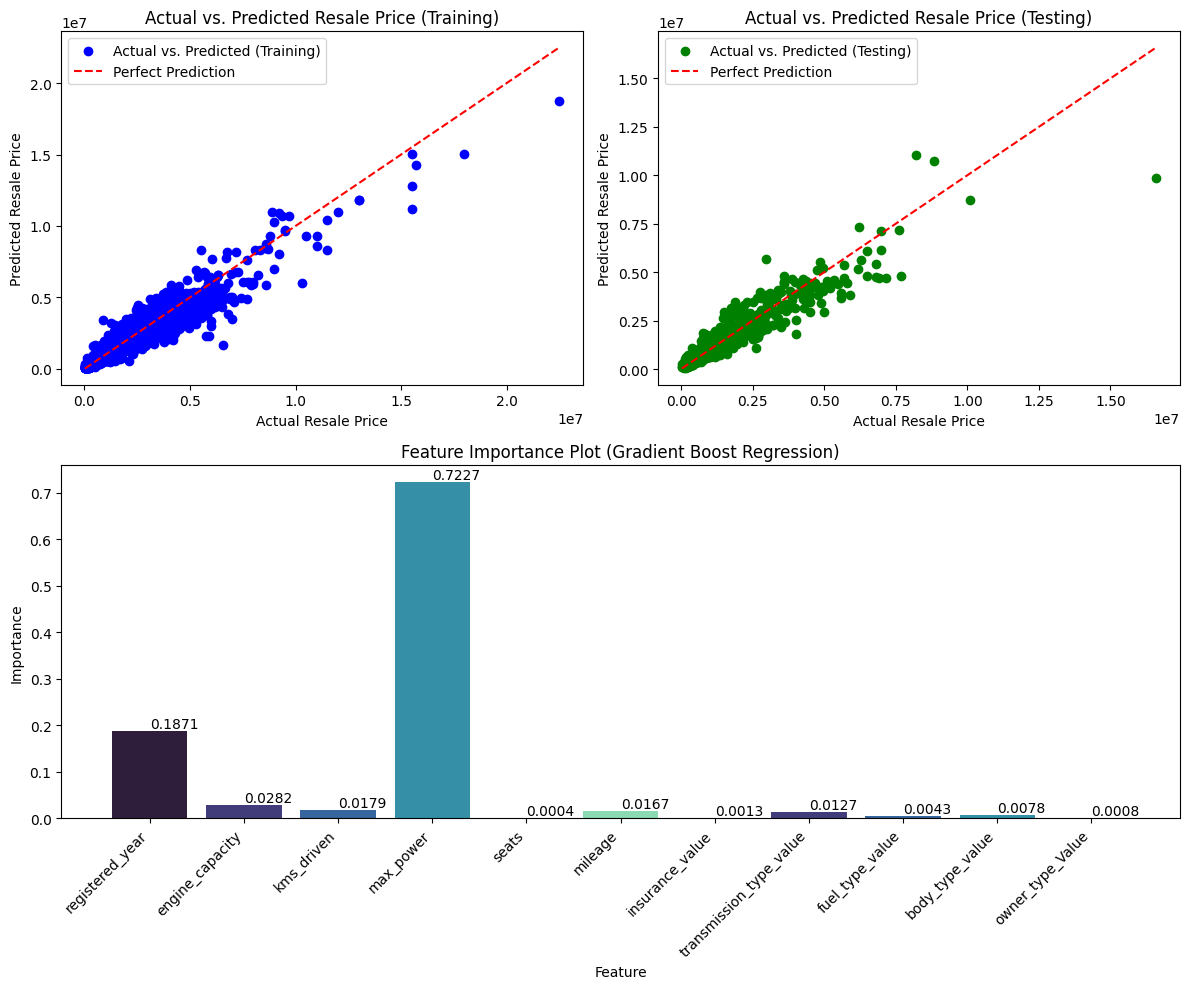

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


# Creating and training the Gradient Boosting Regression model
gb_regressor = GradientBoostingRegressor(random_state=2024)
gb_regressor.fit(X_train, y_train)

# Making predictions
y_pred_test_gbr = gb_regressor.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred_test_gbr)
print(f'Gradient Boost Regression Mean Absolute Error: {mae}')

mse = mean_squared_error(y_test, y_pred_test_gbr)
print(f'Gradient Boost Regression Mean Squared Error: {mse}')
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_gbr))
print(f'Gradient Boost Regression Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test, y_pred_test_gbr)
print(f'Gradient Boost Regression R^2 Score: {r2}')

# Calculate F-statistics
n = len(y_test)  # Number of samples
k = X_test.shape[1]  # Number of features
F_statistic = (mae**2) / (mse / (n - k - 1))
print(f'F-Statistic: {F_statistic}')
print()  # creating space b/w graph and text

# Plotting actual vs. predicted values for training data
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
y_pred_train = gb_regressor.predict(X_train)
plt.scatter(y_train, y_pred_train, color='blue', label='Actual vs. Predicted (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs. Predicted Resale Price (Training)')
plt.legend()

# Plotting actual vs. predicted values for testing data
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_test_gbr, color='green', label='Actual vs. Predicted (Testing)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs. Predicted Resale Price (Testing)')
plt.legend()

# Get feature importances from the trained model
feature_importance_rf = gb_regressor.feature_importances_

# Define color palette
palette = sns.color_palette("mako")

# Create a bar plot
plt.subplot(2, 1, 2)
bars = plt.bar(range(len(feature_importance_rf)), feature_importance_rf, tick_label=X.columns, color=palette)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Plot (Gradient Boost Regression)')
plt.xticks(rotation=45, ha='right')

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), va='bottom', color='black', fontsize=10)

plt.tight_layout()
plt.show()


Gradient Boost Regression:

* This ensemble method demonstrates substantial improvement over linear and ridge regression, showcasing its capability to handle complex relationships and interactions among features. It outperforms decision trees by iteratively correcting errors, leading to better generalization and lower error metrics.

* Although there's just a slight improvement in test accuracy compared to Decision Trees, we can clearly see the difference in test and train graphs indicating that the model is better at capturing underlying features. However, in Decision Trees, there is clear overfitting.



Outputs:

 Ensemble of weak learners, feature importance.

Insights:

Gradient boosting can further improve prediction accuracy by sequentially adding weak learners (trees) to correct the errors of previous learners, leading to a strong overall model.

Similar to random forests, feature importance from gradient boosting can provide valuable insights into the relative importance of different features in predicting resale prices.


## 5. Random Forest Regressor:

Random Forest Regression Mean Absolute Error: 110432.8500642179
Random Forest Regression Mean Squared Error: 60993873991.54567
Random Forest Regression Root Mean Squared Error: 246969.3786515763
Random Forest Regression R^2 Score: 0.9246581871708178
F-Statistic: 661.4177475017933



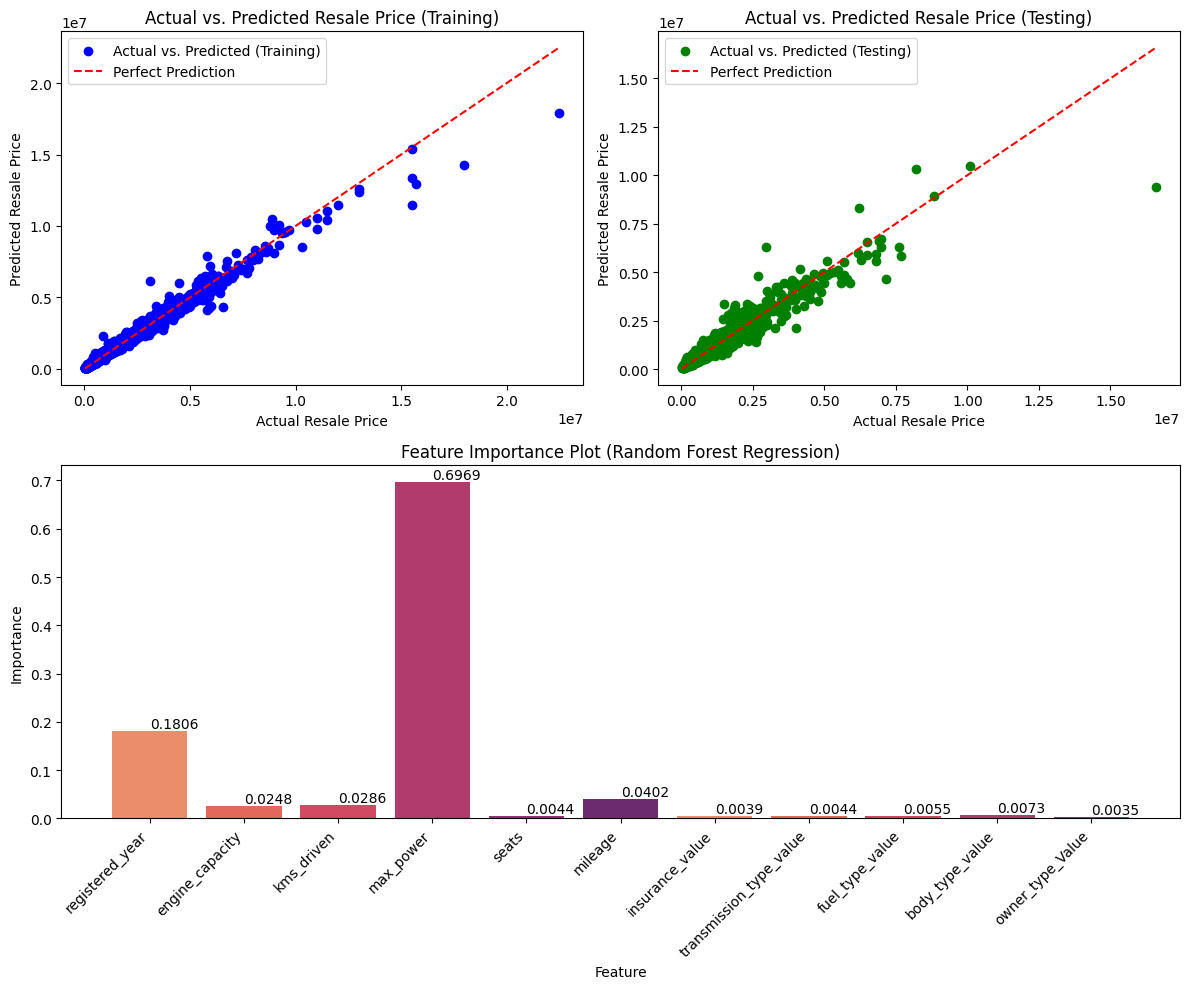

In [ ]:
from sklearn.ensemble import RandomForestRegressor


# Initialize and fit Random Forest Regression model
modelrf = RandomForestRegressor(n_estimators=100, random_state=8)
modelrf.fit(X_train, y_train)

# Make predictions
predictions = modelrf.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, predictions)
print(f'Random Forest Regression Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, predictions)
print(f'Random Forest Regression Mean Squared Error: {mse}')

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Random Forest Regression Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test, predictions)
print(f'Random Forest Regression R^2 Score: {r2}')



# Calculate F-statistics
n = len(y_test)  # Number of samples
k = X_test.shape[1]  # Number of features
F_statistic = (mae**2) / (mse / (n - k - 1))
print(f'F-Statistic: {F_statistic}')
print()  # creating space b/w graph and text

# Plotting actual vs. predicted values for training data
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
y_pred_train = modelrf.predict(X_train)
plt.scatter(y_train, y_pred_train, color='blue', label='Actual vs. Predicted (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs. Predicted Resale Price (Training)')
plt.legend()

# Plotting actual vs. predicted values for testing data
plt.subplot(2, 2, 2)
plt.scatter(y_test, predictions, color='green', label='Actual vs. Predicted (Testing)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs. Predicted Resale Price (Testing)')
plt.legend()

# Get feature importances from the trained model
feature_importance_rf = modelrf.feature_importances_

# Define color palette
palette = sns.color_palette("flare")

# Create a bar plot
plt.subplot(2, 1, 2)
bars = plt.bar(range(len(feature_importance_rf)), feature_importance_rf, tick_label=X.columns, color=palette)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Plot (Random Forest Regression)')
plt.xticks(rotation=45, ha='right')

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), va='bottom', color='black', fontsize=10)

plt.tight_layout()
plt.show()


Random Forest Regression:

* Similar to gradient boosting, random forests also leverage ensemble learning but with different techniques for creating diverse models. It provides excellent performance with lower error metrics and high R-squared, indicating robustness and the ability to handle noise and overfitting better.
* A clear indication is that all models are giving more importance to maximum power in predicting resale price.


Outputs:

Ensemble of decision trees, feature importance.

Insights:

Random forests can provide more accurate predictions than individual decision trees by reducing overfitting and capturing complex patterns in the data.

Feature importance from random forests can offer more robust insights compared to a single decision tree, as it considers the consensus of multiple trees.


## 6. XGBoost Regression:

XGBoost Regressor Mean Absolute Error: 107590.56797816265
XGBoost Regressor Mean Squared Error: 57000097154.21468
XGBoost Regressor Root Mean Squared Error: 238746.93119329237
XGBoost Regressor R-squared: 0.9295914430417505
F-Statistic: 3307.9999999999995



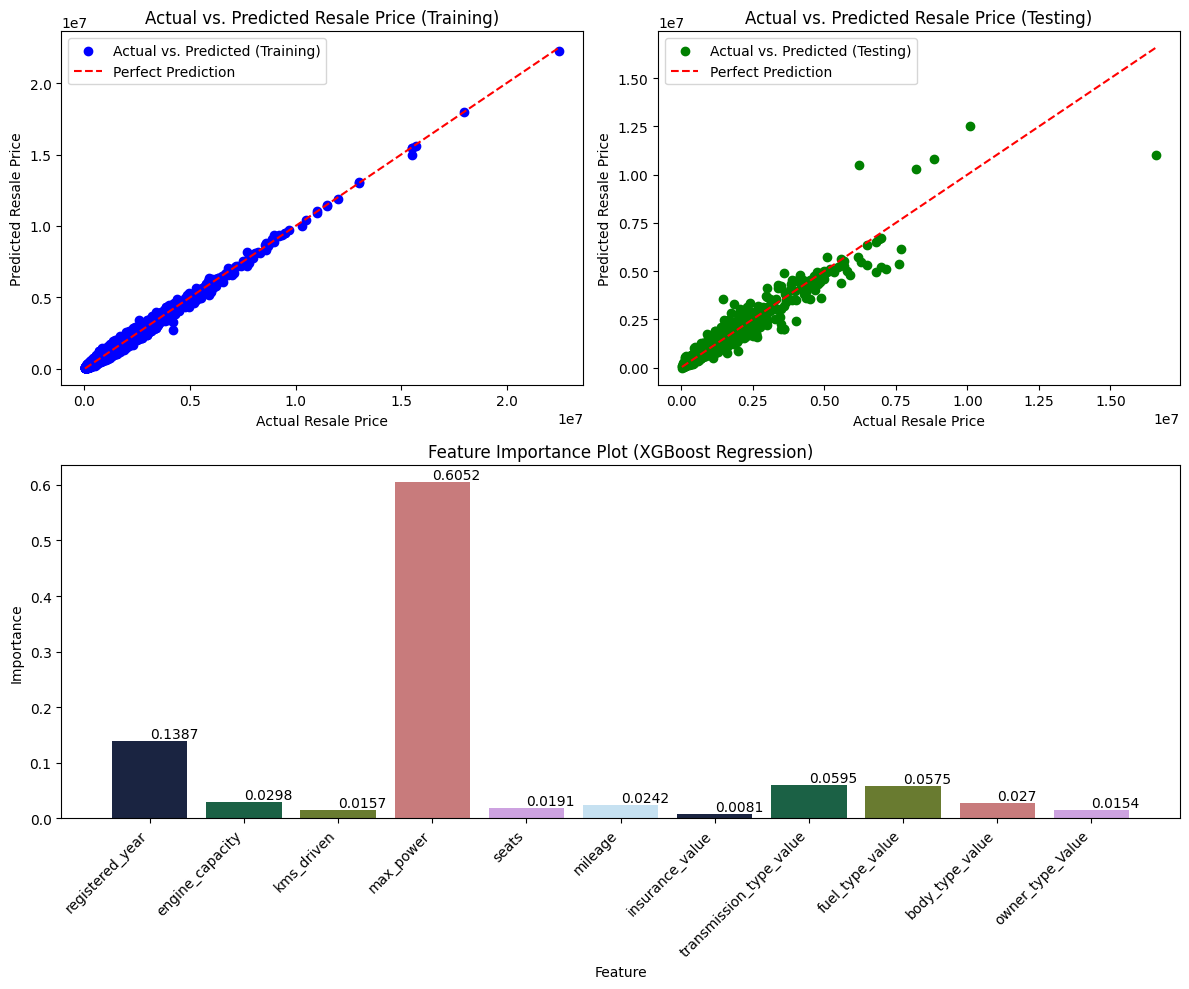

In [ ]:
from xgboost import XGBRegressor

# Initialize and fit XGBoost Regressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Making predictions
xgb_predictions = xgb_model.predict(X_test)

# Calculate and print evaluation metrics
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
print(f'XGBoost Regressor Mean Absolute Error: {xgb_mae}')

xgb_mse = mean_squared_error(y_test, xgb_predictions)
print(f'XGBoost Regressor Mean Squared Error: {xgb_mse}')

xgb_rmse = np.sqrt(xgb_mse)
print(f'XGBoost Regressor Root Mean Squared Error: {xgb_rmse}')

xgb_r2 = r2_score(y_test, xgb_predictions)
print(f'XGBoost Regressor R-squared: {xgb_r2}')

# Calculate F-statistics
n = len(y_test)  # Number of samples
k = X_test.shape[1]  # Number of features
F_statistic = (xgb_rmse**2) / (xgb_mse / (n - k - 1))
print(f'F-Statistic: {F_statistic}')
print()  # creating space b/w graph and text

# Plotting actual vs. predicted values for training data
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
y_pred_train = xgb_model.predict(X_train)
plt.scatter(y_train, y_pred_train, color='blue', label='Actual vs. Predicted (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs. Predicted Resale Price (Training)')
plt.legend()

# Plotting actual vs. predicted values for testing data
plt.subplot(2, 2, 2)
plt.scatter(y_test, xgb_predictions, color='green', label='Actual vs. Predicted (Testing)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs. Predicted Resale Price (Testing)')
plt.legend()

# Get feature importances from the trained model
feature_importance = xgb_model.feature_importances_
palette = sns.color_palette("cubehelix")

# Create a bar plot
plt.subplot(2, 1, 2)
bars = plt.bar(range(len(feature_importance)), feature_importance, tick_label=X.columns, color=palette)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Plot (XGBoost Regression)')
plt.xticks(rotation=45, ha='right')

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), va='bottom', color='black', fontsize=10)

plt.tight_layout()
plt.show()


XGBoost Regressor:

* It further improves upon gradient boosting by introducing more regularization techniques and parallel computation, resulting in even lower error metrics and higher R-squared. XGBoost demonstrates superior predictive power and robustness, making it a top choice for regression tasks, as evidenced by its leading performance among the models evaluated.

* Almost a perfect training fit, yet still performing exceptionally well on test data as well, with the highest value of F-statistic so far.

* This would be the best model yet for this project, and we would like to implement this model for our final tool deliverable backend.


Outputs:

 Ensemble of weak learners (boosted trees), feature importance.

Insights:

XGBoost is known for its efficiency and performance in gradient boosting, often providing more accurate predictions than traditional gradient boosting methods.
Feature importance from XGBoost can highlight the most influential features in predicting car resale prices, helping to identify key factors affecting resale values.

By analyzing the outputs and insights from these algorithms, you can gain a comprehensive understanding of the factors influencing car resale values and make informed decisions in the used automobile market.

## References:

 * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
 * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
 * https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
 * https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
 * https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
 * https://xgboost.readthedocs.io/en/stable/python/python_api.html
 * https://seaborn.pydata.org/tutorial/color_palettes.html


#PROJECT DETAILS:

###Group Members:

* Srinag Marni
* Atharv Hejib
* Srinwanti Sarkar

Our deepest gratitude to ***Prof. Shamsad Parvin*** for invaluable guidance.

Special acknowledgment to ***Jaskirat Singh*** for pivotal support in data processing/model building, benefiting all.

#End of Phase 2